Taken from [here](https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'

df = pd.read_csv(file_url, sep=';', index_col='Date_time',
                 parse_dates={'Date_time': ['Date', 'Time']},
                 infer_datetime_format=True, compression='zip')

print(df.shape)
df.head()

C:\Users\James\AppData\Local\Temp\ipykernel_24136\1593507250.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_url, sep=';', index_col='Date_time',


(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# there are some non-numeric values in the dataframe
# convert all columns to numeric values and coerce non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [5]:
# which columns contain nan values?
df.isna().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [6]:
# replace all nan values with median of the column
df.fillna(df.mean(), inplace=True)
df.isna().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

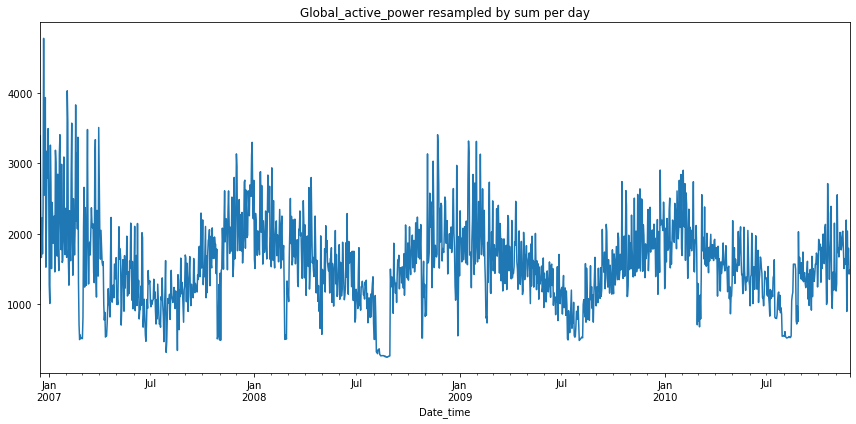

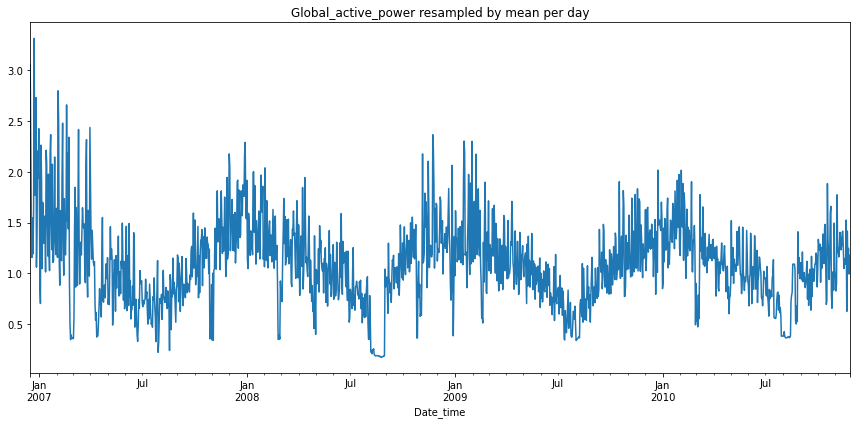

In [11]:
df['Global_active_power'].resample('D').sum().plot(
    title='Global_active_power resampled by sum per day',
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()   

df['Global_active_power'].resample('D').mean().plot(
    title='Global_active_power resampled by mean per day',
    figsize=(12, 6)
) 
plt.tight_layout()
plt.show()

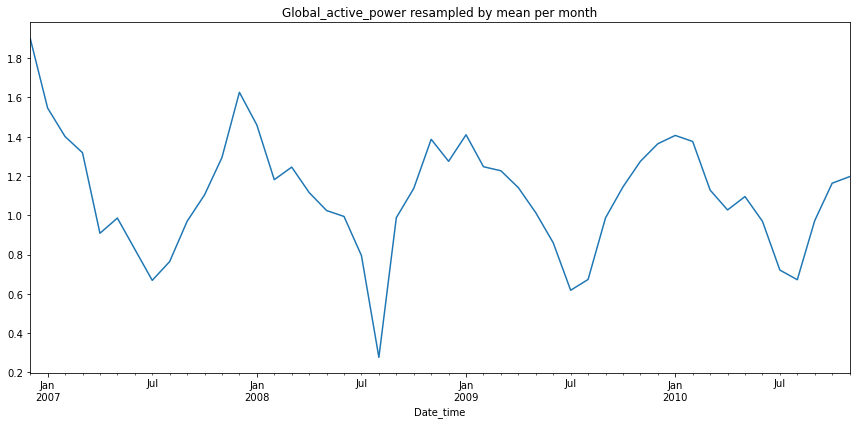

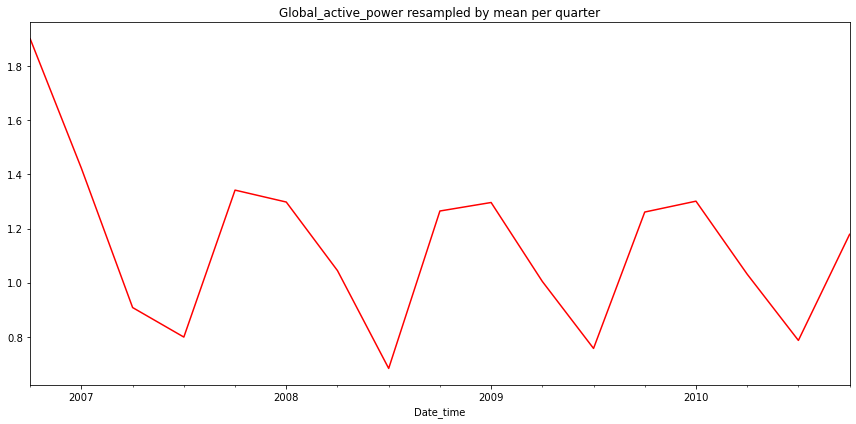

In [13]:
df['Global_active_power'].resample('M').mean().plot(
    title='Global_active_power resampled by mean per month',
    figsize=(12, 6)
) 
plt.tight_layout()
plt.show()

df['Global_active_power'].resample('Q').mean().plot(
    title='Global_active_power resampled by mean per quarter',
    color='red',
    figsize=(12, 6)
) 
plt.tight_layout()
plt.show()

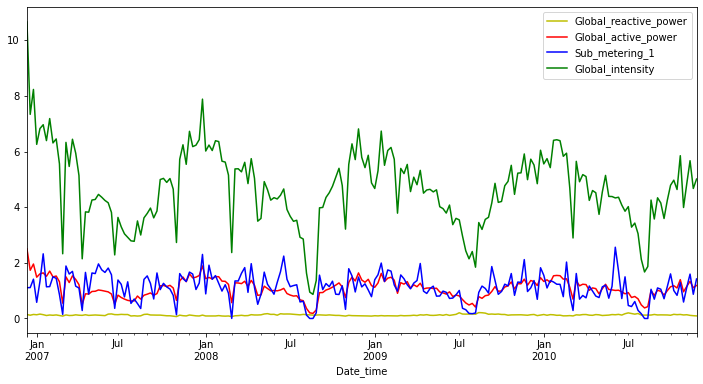

In [15]:
## resampling over week and computing mean
df['Global_reactive_power'].resample('W').mean().plot(color='y', legend=True, figsize=(12, 6))
df['Global_active_power'].resample('W').mean().plot(color='r', legend=True)
df['Sub_metering_1'].resample('W').mean().plot(color='b', legend=True)
df['Global_intensity'].resample('W').mean().plot(color='g', legend=True)
plt.show()